#TWITTER SENTIMENT ANALYSIS
##Group 5:
###Kulsoom Kamil Khan 
###Rida Patel

### Guidlines for Running the Code:
1. Run the installation and Imports Section:
    - run the cell 3 times to upload the emoticon lexicon, hashtag sentiment lexicon zip, and csv containing extracted tweets (This should be new_tweets.csv, or extracted_tweets.csv)
    - alternatively, if you want to pull tweets using your own developer account, proceed to the Data Collection section

2. Run Data Collection Section (if required)

3. Run Handle the Data Section: 
  - if you have decided to pull your own tweets, then replace 'new_tweets.csv' and instead, load in your resultant csv as a dataframe.

4. Run all other sections as usual, in order. 

###Installations and Imports

In [2]:
!pip install schedule
!pip install vaderSentiment
!pip install -U scikit-learn
!pip install pyLDAvis
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 5.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 57.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tweepy
import textblob
import zipfile
import re
import os
import json
import string 
import time
import datetime
import schedule
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
from tweepy import OAuthHandler
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import imblearn
from imblearn.over_sampling import SMOTE
import nltk
assert sklearn.__version__ >= "0.20"
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import NMF
import pyLDAvis
import pyLDAvis.lda_model
from sklearn.decomposition import LatentDirichletAllocation as lda
import yellowbrick.classifier
from yellowbrick.classifier import ROCAUC
from wordcloud import WordCloud
WORD_CLOUD = WordCloud()
from sklearn.model_selection import GridSearchCV
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
pd.set_option('display.max_colwidth', None)

In [7]:
# Upload Required Files - run multiple times as needed

from google.colab import files
uploaded = files.upload()

Saving Emoji_Sentiment_Data_v1.0.csv to Emoji_Sentiment_Data_v1.0.csv


In [8]:
# Unzip NRC Lexicon Files
with zipfile.ZipFile("/content/NRC-Hashtag-Sentiment-Lexicon-v0.1.zip", "r") as z_fp:
    z_fp.extractall("./")

!gzip -d /content/NRC-Hashtag-Sentiment-Lexicon-v0.1/unigrams-pmilexicon.txt.gz


###A. Data Collection

In [ ]:
#Twitter API Credentials:
#Can be saved locally in a different file (either text or json; check links to save keys seperately before submission if necessary)

consumer_key = 'wuTbzGUXeuAU5eSRnbzsiJ9Hs'
consumer_secret = 'Fjg7Fx0VjTUh2WaGLjhkBqisKBJTIR71YStenZksCBB0hFRRSV'
access_token = '1620435623701057537-2erXZ1W3BMVvbDP0fNwgBAzMJiYbpS'
access_token_secret = 'yFpKNbeO77f7J7k8r3KGTgtoIrqYSRHBpbXq5F0oXdOO7'

In [ ]:
auth_handler = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth_handler.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth_handler)

#Tweet Collection
#Themes: 'Meta Verse', 'Innovation', 'Sustainability', 'Technology Footprint', 'Artificial Intelligence', 
#'Ethics', 'Inflation', 'COP 28' , 'Museum of the Future', 'Bitcoins', 'Cyber Attacks'

search_topic = "(technology and innovation in UAE) OR (technology in UAE) OR (innovation in UAE) OR (#technologyinuae) OR (#innovationinuae) OR (@TIIuae)"

themesToSearch = [
    '(technology and innovation in UAE) OR (technology in UAE) OR (innovation in UAE) OR (#technologyinuae) OR (#innovationinuae) OR (@TIIuae)',
    search_topic + 'AND (Meta Verse OR meta verse OR #Metaverse OR #metaverse OR #meta verse OR @metaverse OR Metaverse OR metaverse)',
    search_topic + 'AND (Innovation OR innovation OR #Innovation OR #innovation OR @innovation)',
    search_topic + 'AND (Sustainability OR sustainability OR #Sustainability OR #sustainability OR @sustainability)',
    search_topic + 'AND (Technology Footprint OR technology footprint OR #Technology Footprint OR #technology footprint OR @Technology Footprint)',
    search_topic + 'AND (Artificial Intelligence OR ArtificialIntelligence OR artificial intelligence OR AI OR #Artificial Intelligence OR #AI OR #artificial intelligence OR @artificial intelligence @Artificial Intelligence)',
    search_topic + 'AND (Ethics OR ethics OR #Ethics OR #ethics)',
    search_topic + 'AND (Inflation OR inflation OR #Inflation OR #inflation)',
    search_topic + 'AND (COP 28 OR cop 28 OR #COP 28 OR #cop 28 OR #cop28 OR @COP 28 OR @cop 28 OR @COP28)',
    search_topic + 'AND (Museum of the Future OR museum of the future OR #Museum of the Future OR #museum of the future OR #museumofthefuture OR @Museum of the Future OR @museumofthefuture)',
    search_topic + 'AND (Bitcoins OR Bitcoin OR bitcoin OR bitcoins OR #Bitcoins OR #Bitcoin OR #bitcoin OR @Bitcoins OR @Bitcoin OR @bitcoin)',
    search_topic + 'AND (Cyber Attacks OR Cyber Attack OR cyber attack OR cyber attacks OR CyberAttacks OR cyberattacks OR #Cyber Attacks OR #cyber attacks OR #Cyberattack OR @CyberAttacks OR @cyberattack)'
]

num_tweets = 1000
tweetSet = set()
tweet_count = 0

for i in range(len(themesToSearch)):
  search_topic = themesToSearch[i]
  tweets = tweepy.Cursor(api.search,
                       q='{} -filter:retweets'.format(search_topic), #no retweets
                       count=100,
                       tweet_mode = 'extended',
                       exclude_replies=True,
                       include_entities=False,
                       lang='en').items(num_tweets)
  
  for tweet in tweets:
    tweetBody = tweet.full_text
    tweetSet.add(tweetBody)
    tweet_count += 1
    #print(tweet.full_text) #uncomment to check tweets retrieved

print("\nNumber of tweets retrieved: ", tweet_count)
print("\nNumber of unique tweets retrieved: ", (len(tweetSet)))   


#Creating data frame for the tweets
tweet_df = pd.DataFrame(tweetSet, columns=['Tweet Body'])
tweet_df = tweet_df.drop_duplicates()
tweet_df.to_csv('extractedTweets.csv')



Number of tweets retrieved:  780

Number of unique tweets retrieved:  464


####Handle the Data
Load the data, clean it and convert it to a usable format for the rest of the implementation

In [10]:
#set chunksize to read the file in smaller pieces
chunksize = 1000

# create an empty dataframe to store the chunks
tweet_df = pd.DataFrame()

# read the file in chunks and append to the dataframe
for chunk in pd.read_csv("extractedTweets.csv", chunksize=chunksize):
    tweet_df = pd.concat([tweet_df, chunk], ignore_index=True)

# Set the type of each tweet to string
tweet_df['Tweet Body'] = tweet_df['Tweet Body'].astype(str)

In [11]:
""" Function to clean tweets 
Note to self: from https://www.youtube.com/watch?v=ujId4ipkBio"""

def clean(tweet): 
    tweet = re.sub(r"(@[A-Za-z0-9]+)", "", tweet) # remove mentions
    tweet = re.sub(r"https?:\/\/\S+", "", tweet) # Remove http links
    tweet = re.sub(r"\n", "", tweet)
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    
    return tweet

# Apply the clean function  
tweet_df['Tweet Body'] = tweet_df['Tweet Body'].apply(clean)

# Display Cleaned Tweets -> remove later
tweet_df.head()

,Unnamed: 0,Tweet Body
0,0,Between February 2019 and June 2021 Kashani and his coconspirators used two front companies in the UAE to illegally procure electronic goods and technology from multiple US technology companies including one located in Brooklyn for end users in Iran
1,1,HongKongChief Executive says visit to MiddleEast yields fruitful results13 memorandums were exchanged btw HK and enterprisesorganizations in SaudiArabia and UAE covering areas finance innovation and technology construction transport and energyAsia China
2,2,Way to goAbu Dhabi’s tech ecosystem Hub71 has started a 2 billion fund to back Web3 and Blockchain technology startups in the UAE
3,3,Vice Chairman of the Dubai Academic Health Corporation formally kicked off the Medlab Middle East Exhibition and Congress 2023 happening in Dubai Dubai medical technology Science Sustainability UAE Health event
4,4,Space MakeitintheEmirates Omran Sharaf Assistant Minister of Foreign Affairs and International Cooperation for Advanced Science and Technology said space organisations should not only sell services but also “share knowledge openly” with…


## B. Data Labelling

Initial Analysis of Tweet Polarity 
> VADER and Textblob are 2 popular Python libraries that we considered for initial analysis of the tweets. TextBlob uses a pattern-based approach to analyse text, whereas, Vader is rule-based and is designed specifically for social media sentiment analysis and can thus better capture characteristics such as irony, sarcasm, slang and abbreviations specific to social media language

For this reason, the decision was made to use VADER for initial sentiment analysis.   



In [12]:
# Initialise VADER sentiment analyzer object
vaderAnalyzer = SentimentIntensityAnalyzer()

""" Function that finds the sentiment of tweets using VADER polarity scores (the compound score)"""
def analyze(tweet):
  polarity = vaderAnalyzer.polarity_scores(tweet)
  compound = polarity['compound']

  if compound >= 0.05:
    sentiment = 'positive'
  elif compound <= -0.05  :
    sentiment = 'negative' 
  else:
    sentiment = 'neutral'
  
  return sentiment

# Label Tweets
tweet_df['sentiment'] = tweet_df['Tweet Body'].apply(analyze)
tweet_df.head() 



,Unnamed: 0,Tweet Body,sentiment
0,0,Between February 2019 and June 2021 Kashani and his coconspirators used two front companies in the UAE to illegally procure electronic goods and technology from multiple US technology companies including one located in Brooklyn for end users in Iran,neutral
1,1,HongKongChief Executive says visit to MiddleEast yields fruitful results13 memorandums were exchanged btw HK and enterprisesorganizations in SaudiArabia and UAE covering areas finance innovation and technology construction transport and energyAsia China,positive
2,2,Way to goAbu Dhabi’s tech ecosystem Hub71 has started a 2 billion fund to back Web3 and Blockchain technology startups in the UAE,neutral
3,3,Vice Chairman of the Dubai Academic Health Corporation formally kicked off the Medlab Middle East Exhibition and Congress 2023 happening in Dubai Dubai medical technology Science Sustainability UAE Health event,neutral
4,4,Space MakeitintheEmirates Omran Sharaf Assistant Minister of Foreign Affairs and International Cooperation for Advanced Science and Technology said space organisations should not only sell services but also “share knowledge openly” with…,positive


 
#### Improving the labelling performance of VADER: Using Ensemble Methods. 

We will use weighted-voting using the VADER sentiment analyzer, the Emoji Sentiment Ranking lexicon and the NRC Hashtag Sentiment lexicon to categorize the tweets. 

We will use the Emoji Sentiment Ranking lexicon (http://kt.ijs.si/data/Emoji_sentiment_ranking/). It is based on a crowdsourced sentiment ranking and thus reflects how people generally percieve and use each emoji. This makes this lexicon in particular useful for analyzing social media content like tweets, which often contain a large number of emojis.

Furthermore, we will also incorporate the NRC Hashtag Sentiment lexicon, which is generated from the Twitter Emotion Corpus. The lexicon assigns a sentiment score based on a word's tendency to co-occur with the emotion-word hashtag. (More info. on: http://saifmohammad.com/WebPages/lexicons.html)

In [13]:
""" Helper function to get the emoticon and its associated sentiment score from a file line """ 
def getEmotScore(line):
  listt = line.strip().split(',')
  return listt[0], listt[3]

# Load the emoticon lexicon file into a dictionary
emoticon_lexicon = {}
with open('/content/Emoji_Sentiment_Data_v1.0.csv', 'r') as f:
  next(f)
  for line in f:
    emoticon, score = getEmotScore(line)
    emoticon_lexicon[emoticon] = float(score)

def get_emot_sent(tweet):
  sentiment_score = 0
  num_emojis = 0
  # Extract emoticons from the tweet and add their sentiment scores to the overall sentiment score
  
  for w in tweet:
    # handler for not looking into repeated emojis
    if w in emoticon_lexicon:
      num_emojis += 1
      sentiment_score += emoticon_lexicon[w]
  
  # if at least 1 emoji found in the tweet
  if num_emojis > 0:
    # scale the sentiment score
    sentiment_score /= num_emojis
    return sentiment_score, True

  # no emojis found in tweet
  return 0, False



In [14]:

# Load the NRC Hashtag Sentiment Lexicon
nrc_lexicon = {}
with open('NRC-Hashtag-Sentiment-Lexicon-v0.1/unigrams-pmilexicon.txt', 'r') as f:
    for line in f:
        word, score, _, _ = line.strip().split('\t')
        nrc_lexicon[word] = float(score)

# Scale the scores to be between -1 and 1
max_score = max(nrc_lexicon.values())
min_score = min(nrc_lexicon.values())
range_score = max_score - min_score

for word in nrc_lexicon:
    score = nrc_lexicon[word]
    scaled_score = ((score - min_score) / range_score) * 2 - 1
    nrc_lexicon[word] = scaled_score


def get_nrc_sent(tweet):
  num_matches = 0
  sentiment = 0

  # Add the NRC Hashtag Sentiment Lexicon scores to the overall sentiment score
  words = tweet.split()
  for word in words:
    if word in nrc_lexicon:
      num_matches += 1
      sentiment += nrc_lexicon[word]

   
  # if at least 1 word match found in the tweet
  if num_matches > 0:
    # scale the sentiment score
    sentiment /= num_matches
    return sentiment, True

  # no word matches found
  return 0, False


In [15]:
# Define a function to calculate the overall sentiment score of a tweet
def get_sentiment(tweet):

  # Initialize the overall sentiment score to 0
  sentiment_score = 0

  # Add the Vader polarity scores to the overall sentiment score
  sentiment_score +=  vaderAnalyzer.polarity_scores(tweet)['compound']
  
  # Get Emoji Sentiment Score: 
  score, emot_status = get_emot_sent(tweet)
  sentiment_score += score

  # Get NRC Hashtag Sentiment Lexicon Score: 
  score, nrc_status = get_nrc_sent(tweet)
  sentiment_score += score

  # Find the final weighted score: 
  if emot_status & nrc_status == 1:
    sentiment_score /= 3
  elif emot_status | nrc_status == 1:
     sentiment_score /= 2

  if sentiment_score >= 0.05:
    return 'positive', sentiment_score
  elif sentiment_score <= -0.05  :
    return 'negative', sentiment_score
  return 'neutral', sentiment_score

In [16]:
# Update Sentiments Label Tweets
tweet_df['updated sentiments'], tweet_df['sentiment_score'] = zip(*tweet_df['Tweet Body'].apply(get_sentiment))

In [17]:
# Display Tweets that have differing labels
subDf = tweet_df.loc[tweet_df['sentiment'] != tweet_df['updated sentiments']]
subDf.head()

,Unnamed: 0,Tweet Body,sentiment,updated sentiments,sentiment_score
4,4,Space MakeitintheEmirates Omran Sharaf Assistant Minister of Foreign Affairs and International Cooperation for Advanced Science and Technology said space organisations should not only sell services but also “share knowledge openly” with…,positive,neutral,0.033776
13,13,austeth🔥 Open to offers 👍Can be used as✔️University of Science and Technology AmericanAfrican Abbottabad Pakistan Ahsanullah Bangladesh Ajman UAE Anhui China✔️Australia✔️Austria✔️Aust surname✔️Aust a village in England,negative,positive,0.082442
25,25,ASET2023 multiconferences will be held at HCT under the theme of Global Challenges in Engineering and Technology,positive,neutral,0.030248
33,33,During SheWinsArabia networking event in Dubai this week 🌟 The initiative is coled by org and the UAE’s in partnership with the and WeFiMENAstartups worldgovernmentsummit Technology uae femalefounders femaleentrepreneur KESK GreenTech,neutral,positive,0.208948
41,41,Accelerating the use of blockchain technology in supply chains MNW team up with GEEQ 3M MCGulftainer amp FCL signed to pilot GEEQ services integrated into MNW 🇦🇪Gulftainer UAE largest port operator🇨🇦FCL Canada’s 3rd largest food distributor,neutral,positive,0.258248


### Conclusions with Experiments on Data Labelling
1. Vader assigned sentiment labels are inconsistent. 
For example, they change for very similar tweets. Whereas, our method of combining several labelling approaches stays consistent in its assigned labels. 
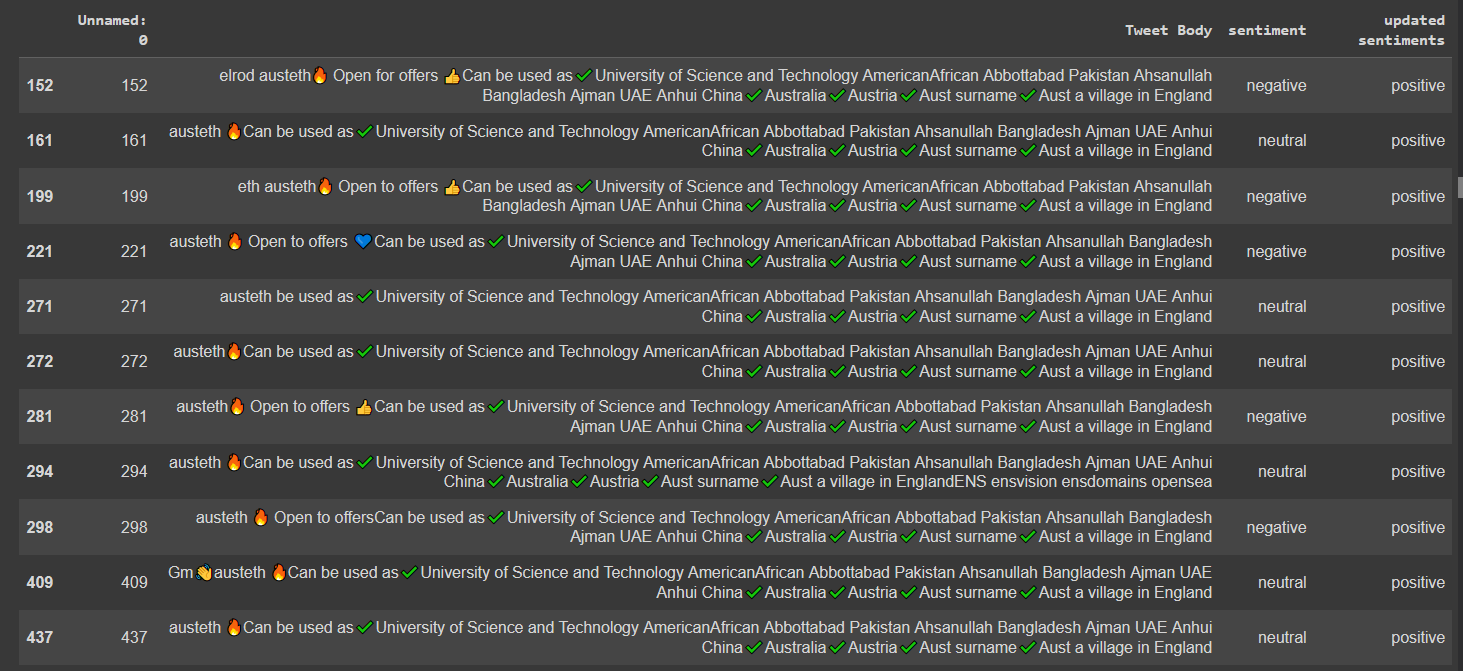

2. Our combined approach is more effective at recognizing positive tweets.
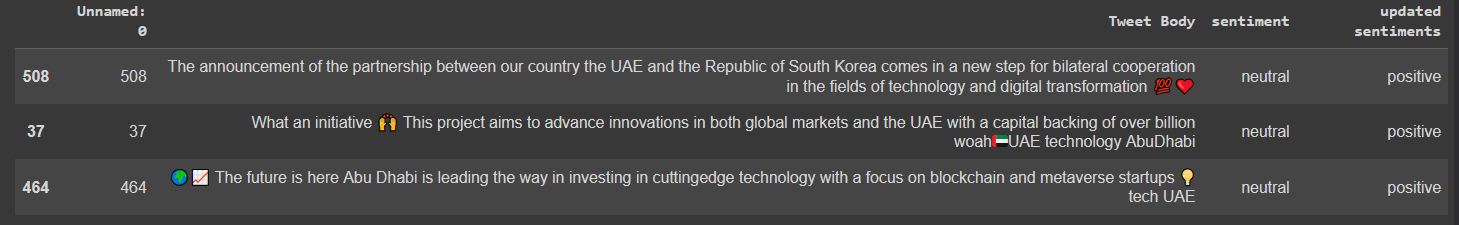

3. Our combined approch is better at assigning sentiments to tweets that are particularly difficult to place. For instance, this tweet below has some undertones of dissapointment towards one entity, and praise towards the other. VADER was not able to capture its semantics and assigned it as a positive tweet, whereas the combined approach was able to recognize the semantics. 
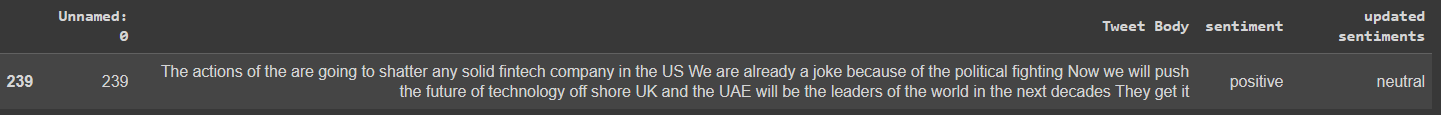 

####Exploratory Data Analysis


<AxesSubplot:>

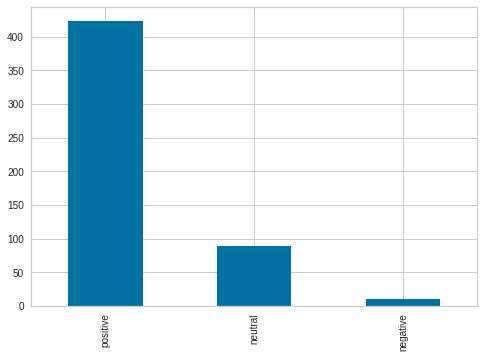

In [18]:
# Plot the distribution of sentiment classes in the dataset to give an idea of how balanced or imbalanced the dataset is
count = tweet_df['updated sentiments'].value_counts()
count.plot(kind='bar')

Balance the dataset by undersampling, i.e., removing a subset of positive tweets. 
Note: We do not equally balance our dataset at this step because we still want to retain a significant portion of these tweets. 
Instead, we will use SMOTE in the later steps to create synthetic samples and then equally balance the dataset.
We choose to combine undersampling and SMOTE approaches because it provides a balance between retaining real samples of our dataset, while preventing overfitting and improves training accuracy. See Experiment ... for more details

In [19]:
# Balance the datasets
new = tweet_df.drop(tweet_df[(tweet_df['sentiment_score'] > 0.05) & (tweet_df['sentiment_score'] < 0.2)].index)

<AxesSubplot:>

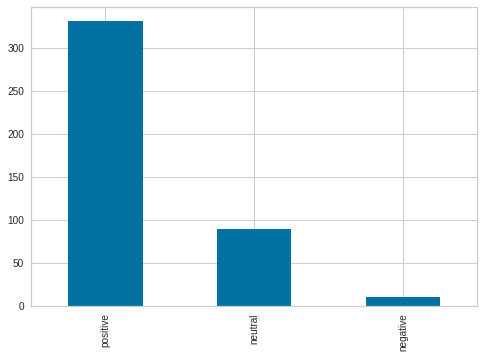

In [20]:
# Plot the distribution of sentiment classes in the dataset to give an idea of how balanced or imbalanced the dataset is
count = new['updated sentiments'].value_counts()
count.plot(kind='bar')

updated sentiments
negative     10
neutral      89
positive    331
dtype: int64


<AxesSubplot:>

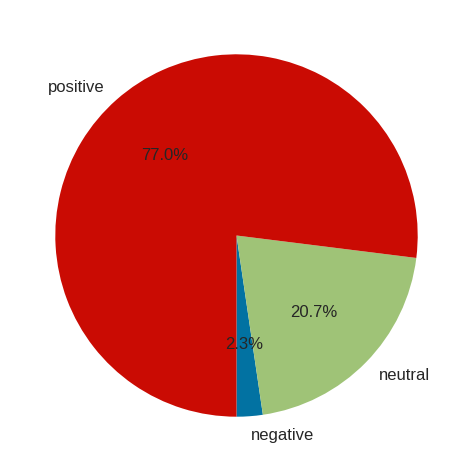

In [55]:
sentiment_counts = tweet_df.groupby(['updated sentiments']).size()
print(sentiment_counts)

#Visualising the sentiment percentage
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

In [21]:
temp = tweet_df
tweet_df = new

## C. Text Analytics Pipeline on Tweets

####Text Processing
Selection between Stemming and Lemmitisation
- It was observed, that the SVM model increased slightly in performance with stemming as compared to lemmatisation, but this was not very significant. 
- Thus, in the case of this project, accuracy of the models did not yield any major differences with either technique. 
- Stemming was chosen as the preferred mode of normalization as it works best when the vocabluary space is small and the documents are large.

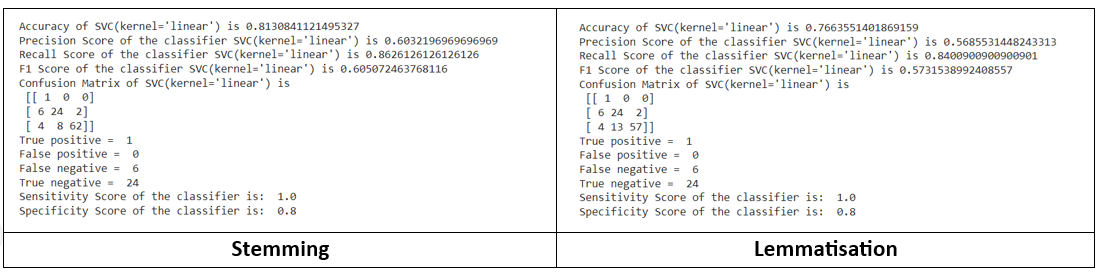


In [22]:
def processed_tweets(text):

  #changing tweets to lowercase
  text = text.lower()

  #removing punctuation and numbers
  punctuate_tweet = str.maketrans('', '', string.punctuation+string.digits)
  text = text.translate(punctuate_tweet)

  #tokenization
  tokens = word_tokenize(text)

  #removing stopwords
  stop_words = set(stopwords.words('english'))
  filtered_words = [w for w in tokens if not w in stop_words]

  #applying stemming 
  snow_stemmer = SnowballStemmer(language='english')
  text = [snow_stemmer.stem(word) for word in filtered_words]

  #convert the list of stemmed words back to a string
  text = " ".join(text)

  return text

tweet_df['processed_tweets'] = tweet_df['Tweet Body'].apply(processed_tweets)
tweet_df.head()

,Unnamed: 0,Tweet Body,sentiment,updated sentiments,sentiment_score,processed_tweets
0,0,Between February 2019 and June 2021 Kashani and his coconspirators used two front companies in the UAE to illegally procure electronic goods and technology from multiple US technology companies including one located in Brooklyn for end users in Iran,neutral,neutral,-0.023419,februari june kashani coconspir use two front compani uae illeg procur electron good technolog multipl us technolog compani includ one locat brooklyn end user iran
2,2,Way to goAbu Dhabi’s tech ecosystem Hub71 has started a 2 billion fund to back Web3 and Blockchain technology startups in the UAE,neutral,neutral,-0.025030,way goabu dhabi ’ tech ecosystem hub start billion fund back web blockchain technolog startup uae
3,3,Vice Chairman of the Dubai Academic Health Corporation formally kicked off the Medlab Middle East Exhibition and Congress 2023 happening in Dubai Dubai medical technology Science Sustainability UAE Health event,neutral,neutral,-0.019122,vice chairman dubai academ health corpor formal kick medlab middl east exhibit congress happen dubai dubai medic technolog scienc sustain uae health event
4,4,Space MakeitintheEmirates Omran Sharaf Assistant Minister of Foreign Affairs and International Cooperation for Advanced Science and Technology said space organisations should not only sell services but also “share knowledge openly” with…,positive,neutral,0.033776,space makeitintheemir omran sharaf assist minist foreign affair intern cooper advanc scienc technolog said space organis sell servic also “ share knowledg open ” with…
5,5,The UAE has already made significant investments in AI and is positioning itself as a leader in the field The country has established the National AI Strategy 2031 which aims to make the UAE a global hub for AI innovation and adoption,positive,positive,0.234844,uae alreadi made signific invest ai posit leader field countri establish nation ai strategi aim make uae global hub ai innov adopt


#### Getting Data Ready for Training - Feature Representation and Data Splitting

In [23]:
# Encode Labels into Integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tweet_df['label'] = le.fit_transform(tweet_df['updated sentiments'])

In [24]:
# Split Data into Train-Test
X_train, X_test, y_train, y_test = train_test_split(tweet_df['processed_tweets'], tweet_df['label'], test_size=0.3, random_state=42)

Create Binary Feature Representations

In [25]:
# Binary Feature Representation
vectorizer = CountVectorizer(binary=True, ngram_range = (1,1))
X_train_bin = vectorizer.fit_transform(X_train)
X_test_bin = vectorizer.transform(X_test)

Create Count Frequency Representations  
- Ngram range selection was done by testing F1-score performance

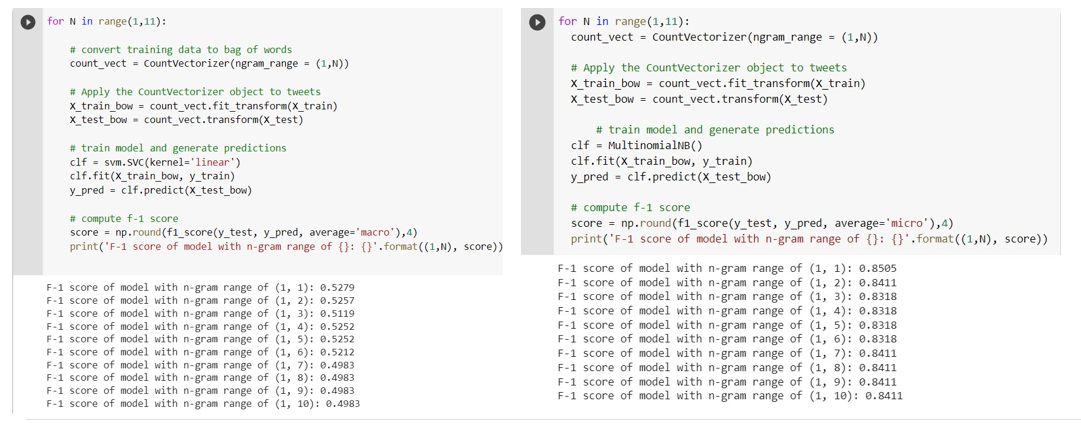

In [26]:
# Apply bag of words
# Create a CountVectorizer object to generate a bag of words representation
# Using unigrams as it gives the best performance

count_vect = CountVectorizer(ngram_range = (1,1))

# Apply the CountVectorizer object to tweets
X_train_bow = count_vect.fit_transform(X_train)
X_test_bow = count_vect.transform(X_test)

Create TF-IDF Feature Representation
TF-IDF representation obtained is a sparse matrix of shape (n_samples,n_features), where n_samples is the number of tweets and n_features is the number of unique words in the dataset. 

In [27]:
# Create a TfidfTransformer object to apply TF-IDF to the bag of words representation
tfidf_transformer = TfidfTransformer()

# Apply the TfidfTransformer object to the bag of words representation
X_train_tfidf = tfidf_transformer.fit_transform(X_train_bow)
X_test_tfidf = tfidf_transformer.transform(X_test_bow)

In [28]:
print(X_train_tfidf[0])

  (0, 1849)	0.18583806843511172
  (0, 1824)	0.20115743120380394
  (0, 1608)	0.1749688075744155
  (0, 1599)	0.1749688075744155
  (0, 1580)	0.14433008203703104
  (0, 1555)	0.1749688075744155
  (0, 1358)	0.1749688075744155
  (0, 1123)	0.2273460548331924
  (0, 977)	0.2273460548331924
  (0, 900)	0.1352939754652069
  (0, 899)	0.2273460548331924
  (0, 797)	0.2273460548331924
  (0, 796)	0.2273460548331924
  (0, 795)	0.42405338412900034
  (0, 615)	0.21202669206450017
  (0, 548)	0.2273460548331924
  (0, 500)	0.2273460548331924
  (0, 485)	0.2273460548331924
  (0, 470)	0.1665379538616843
  (0, 395)	0.1705187056664195
  (0, 249)	0.2273460548331924
  (0, 95)	0.1290107192683388


Document Similarity with Cosine Similiarity

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
# Find cosine similarity between all tweets
cosine_sim = cosine_similarity(X_train_tfidf, X_train_tfidf)

# Get indices of tweets sorted by similarity score in ascending order
indices = np.argsort(cosine_sim)[-50:]

tweet_df.iloc[indices.ravel()].head()

,Unnamed: 0,Tweet Body,sentiment,updated sentiments,sentiment_score,processed_tweets,label
181,181,The twoday event aims to bring together local and international authorities to share ideas and focus on business innovation startup and sustainability in the pursuit of better business opportunities Sharjah UAE,positive,positive,0.423746,twoday event aim bring togeth local intern author share idea focus busi innov startup sustain pursuit better busi opportun sharjah uae,2
318,318,Our hospitals in the UAE are at the forefront of making this technology accessible to the patients we care for The minimally invasive surgical method is preferred by patients and doctors for its many benefits⁣⁣⁣⁣⁣Learn more,positive,positive,0.219510,hospit uae forefront make technolog access patient care minim invas surgic method prefer patient doctor mani benefits⁣⁣⁣⁣⁣learn,2
60,60,the latest AIsmart technologies and solutions in Egypt Saudi Arabia the UAE and the MENA region🤖✨classera partnership technology education saudiarabia egypt uae chatbot artificialintelligence كلاسيرا شراكة البوتبيتكلمعربي البوتبالعربي,positive,positive,0.235686,latest aismart technolog solut egypt saudi arabia uae mena region🤖✨classera partnership technolog educ saudiarabia egypt uae chatbot artificialintellig كلاسيرا شراكة البوتبيتكلمعربي البوتبالعربي,2
291,291,The collaboration between USA Israel Bahrain and UAE in the field of cybertech is a promising development for the advancement of technology With their combined expertise and resources Tel Aviv 2023 is shaping up to be a landmark event for the industry,positive,positive,0.223756,collabor usa israel bahrain uae field cybertech promis develop advanc technolog combin expertis resourc tel aviv shape landmark event industri,2
283,283,6 Effective Trends That Will Transform Enterprise Resource Planning Services in 2023Read full post erp erpsolutions erptrends software AI IoT technology southafrica india uae inzuscene,positive,positive,0.217685,effect trend transform enterpris resourc plan servic read full post erp erpsolut erptrend softwar ai iot technolog southafrica india uae inzuscen,2


Observe Similarity Between the Positive Tweets

Observe Similarity Between Negative Tweets

Conclusions:
Observing the most similar tweets we come to the conclusion that most of them involve common themes such as: 
- Metaverse
- Cryptocurrency
- Cyber Security
- Inflation 
- Covid-19
- Climate Change and Sustainability
- Artificial Intelligence

Create Word Embeddings with GloVe

In [30]:
# Reference:  [https://www.kaggle.com/code/sudharshanravi/happy-or-sad-let-s-find-out]
# encode the target variable
print(y_train)
le.fit(y_train.to_list())
y_train_embed = le.transform(y_train.to_list())
y_test_embed = le.transform(y_test.to_list())

y_train_embed = y_train_embed.reshape(-1,1)
y_test_embed = y_test_embed.reshape(-1,1)

print(y_train_embed)
print("y_train shape:", y_train_embed.shape)
print("y_test shape:", y_test_embed.shape)

490    2
140    2
136    2
167    2
387    2
      ..
83     2
127    1
331    2
423    2
123    2
Name: label, Length: 301, dtype: int64
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [0]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [0]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [0]
 [

In [ ]:
# Get Glove Embedding
%%time

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

In [ ]:
# Reference:  [https://www.kaggle.com/code/sudharshanravi/happy-or-sad-let-s-find-out]
from keras.preprocessing.text import Tokenizer

embeddings_index = {}

"""Read in a pre-trained GloVe (Global Vectors for Word Representation) word embedding file named 'glove.6B.300d.txt', 
which contains word vectors of 300 dimensions for a vocabulary of about 6 billion tokens."""
for line in open('/content/glove.6B.300d.txt'):
    terms = line.split()
    # word = value = terms[0]
    word = terms[0]
    coefs = np.asarray(terms[1:], dtype='float32')
    embeddings_index[word] = coefs

# Tokenize the tweets
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Create a dictionary of vocabulary in the dataset 
twi = tokenizer.word_index

# total unique words in the dataset
unique_words = len(tokenizer.word_index) + 1
print("\nVocabulary Size :", unique_words)  

## Vocabulary Preview(Indexed Dictionary):
### Viewing the first 10 indexes::
for i,(j,k) in enumerate(twi.items()):
    print(j,"-------->",k)
    if i==10:
        break



Vocabulary Size : 2085
uae --------> 1
technolog --------> 2
innov --------> 3
dubai --------> 4
amp --------> 5
world --------> 6
invest --------> 7
’ --------> 8
industri --------> 9
al --------> 10
ai --------> 11
advanc --------> 12
global --------> 13
develop --------> 14
digit --------> 15
startup --------> 16
countri --------> 17
sustain --------> 18
futur --------> 19
abu --------> 20
dhabi --------> 21
educ --------> 22
compani --------> 23
economi --------> 24
emir --------> 25
launch --------> 26
busi --------> 27
sector --------> 28
take --------> 29
partner --------> 30
th --------> 31
see --------> 32
use --------> 33
intern --------> 34
initi --------> 35
govern --------> 36
region --------> 37
new --------> 38
moham --------> 39
ministri --------> 40
platform --------> 41
award --------> 42
year --------> 43
support --------> 44
solut --------> 45
leader --------> 46
commit --------> 47
saudi --------> 48
arabia --------> 49
join --------> 50
first --------> 51
great -

In [ ]:
# Define the dimensions of the GloVe word embeddings
# Reference:  [https://www.kaggle.com/code/sudharshanravi/happy-or-sad-let-s-find-out]
embedding_dim = 300

# Initialize the embedding matrix with zeros
embedding_matrix = np.zeros((unique_words, embedding_dim))

# Iterate over each word in the vocabulary
for word, i in twi.items():
    # Look up the embedding vector for the word in the embeddings_index dictionary
    embedding_vector = embeddings_index.get(word)
    # If an embedding vector is found, add it to the embedding matrix
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
# Reference:  [https://www.kaggle.com/code/sudharshanravi/happy-or-sad-let-s-find-out]
from tensorflow.keras.layers import Embedding

# Set an upper limit on the length of each tweet
max_tweet = 500

# Create Embedding Layer
embedding_layer = Embedding(unique_words,embedding_dim, weights=[embedding_matrix], input_length = max_tweet, trainable = False)

####Define and Construct Classifiers

####Models: Naive Bayes, KNearestNeighbor, Support Vector Machine

In [31]:
models = []

modelA = MultinomialNB(alpha = 1.0)
models.append(modelA)
modelB = KNeighborsClassifier()
models.append(modelB)
modelC = svm.SVC(kernel='linear')
models.append(modelC)

In [32]:
#train and test dataframe on the different models

def train_test_models(X_train, Y_train, X_test, Y_test):

    accuracies = []
    for model in models:

        #train model on data
        model.fit(X_train, Y_train)

        #find accuracy score
        y_pred = model.predict(X_test)
        acc = accuracy_score(Y_test, y_pred)
        print("Accuracy of %s is %s" % (model, acc))

        accuracies.append(acc)

        precision = precision_score(Y_test, y_pred, average='macro')
        print(f"Precision Score of the classifier %s is %s" %
              (model, precision))

        recall = recall_score(Y_test, y_pred, average='macro')
        print(f"Recall Score of the classifier %s is %s" %
              (model, recall))

        fscore = f1_score(Y_test, y_pred, average='macro')
        print(f"F1 Score of the classifier %s is %s" %
              (model, fscore))

        #find confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        print("Confusion Matrix of %s is \n %s" % (model, cm))
        print('True positive = ', cm[0][0])
        print('False positive = ', cm[0][1])
        print('False negative = ', cm[1][0])
        print('True negative = ', cm[1][1])

        sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        print('Sensitivity Score of the classifier is: ', sensitivity)

        specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
        print('Specificity Score of the classifier is: ', specificity)

        visualizer = ROCAUC(model, classes=["Positive", "Negative", "Neutral"])
        visualizer.fit(X_train,
                       Y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
        visualizer.show()  # Finalize and render the figure

        print('\n\n')

    return accuracies  # a list of every models accuracy on the current dataset

####K-fold Cross-Validation

In [33]:
# K-fold Cross-Validation has been done to verify our classifiers against the train test sets
def kfold_model_eval(model):
  k_fold = StratifiedKFold(n_splits=3, shuffle=False, random_state=None)
  clf = model
  clf.fit(X_train_bow,y_train) # traning the model
  scores = cross_val_score(clf, X_train_bow, y_train, cv=10) # using the stratified ten-fold cross-validation method
  acc = scores.mean()

  print(scores)
  print("Accuracy of %s is %s\n"%(clf,acc))

In [35]:
for model in models:
  kfold_model_eval(model)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


[0.80645161 0.83333333 0.83333333 0.86666667 0.76666667 0.86666667
 0.8        0.86666667 0.8        0.83333333]
Accuracy of MultinomialNB() is 0.8273118279569893

[0.64516129 0.53333333 0.63333333 0.63333333 0.4        0.46666667
 0.4        0.53333333 0.56666667 0.7       ]
Accuracy of KNeighborsClassifier() is 0.5511827956989247



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


[0.87096774 0.86666667 0.9        0.86666667 0.83333333 0.86666667
 0.8        0.9        0.7        0.83333333]
Accuracy of SVC(kernel='linear') is 0.843763440860215



#### Convolutional Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D
from keras.utils import to_categorical

def run_cnn(train, test, y_train, y_test, embed = False):
  

  # Define the number of classes and the input shape
  num_classes = 3


  # Create a Sequential model
  model = Sequential()

  if not(embed): 

    # Convert the sparse TF-IDF matrices to dense numpy arrays
    X_train_cnn = train.toarray()
    X_test_cnn = test.toarray()
      
    input_shape = X_train_cnn.shape[1:]

    # Add an embedding layer
    model.add(Embedding(input_dim=input_shape[0], output_dim=64))
  else:
    model.add(embedding_layer)

  # Add a 1D convolutional layer with 64 filters, kernel size of 3, and ReLU activation
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

  # Add a global max pooling layer
  model.add(GlobalMaxPooling1D())

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Add a dense layer with 64 units and ReLU activation
  model.add(Dense(units=64, activation='relu'))

  # Add a dropout layer with a rate of 0.5
  model.add(Dropout(rate=0.5))

  # Add a dense layer with num_classes units and softmax activation
  model.add(Dense(units=num_classes, activation='softmax'))

  # Compile the model with categorical crossentropy loss and Adam optimizer
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


  # Convert integer labels to one-hot-encoded labels
  y_train_cnn = to_categorical(y_train)
  y_test_cnn = to_categorical(y_test)

  # Train the model on the TF-IDF representations of the training set
  model.fit(X_train_cnn, y_train_cnn, batch_size=40, epochs=5, validation_data=(X_test_cnn, y_test_cnn))


#### Recurrant Neural Network


In [ ]:
# Reference: [https://www.kaggle.com/code/sudharshanravi/happy-or-sad-let-s-find-out]

# Building the model
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding,Conv1D,Bidirectional,SpatialDropout1D,Dropout
from tensorflow.keras import Sequential, Model
from tensorflow.keras.callbacks import Callback,ModelCheckpoint,CSVLogger,ReduceLROnPlateau,LearningRateScheduler,EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences


def run_rnn(X_train, y_train, X_test, y_test):
## Learning Rate:
  lr = 1e-2

  MAX_SEQUENCE_LENGTH = 500

  ## Creating the Layers
  sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
  embedding_sequences = embedding_layer(sequence_input)
  x = SpatialDropout1D(0.2)(embedding_sequences)
  x = Conv1D(64, 5, activation='relu')(x)
  x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(512, activation='relu')(x)
  outputs = Dense(1, activation='sigmoid')(x)
  model = tf.keras.Model(sequence_input, outputs) ## Model Object with input and output layers

  ## using the standard Adam as the optimiser(can be tweaked according to the user)
  model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy',
                metrics=['accuracy'])
      
  x_train = pad_sequences(tokenizer.texts_to_sequences(X_train),maxlen = MAX_SEQUENCE_LENGTH)
  x_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen = MAX_SEQUENCE_LENGTH)


  history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))


###Train Classifiers
- Experiment 1 - Train with Binary Feature Representation
- Experiment 2 - Train with Count Frequency Representation
- Experiment 3 - Train with TF-IDF
- Experiment 4 - Train with gloVe Word Embeddings

Experiment 1 - Binary Feature Representation

####SMOTE 
- SMOTE (Synthetic Minority Oversampling Technique) is used for tackling the imbalanced dataset problem.
- SMOTE looks for the k-nearest neighbors from a random example of the chosen minority class. It then creates random values in the feature space between the two examples: the chosen sample and its k-nearest neighbors.






X_train shape before SMOTE:  (301, 1927)
y_train shape before SMOTE:  (301,)
X_train shape after SMOTE:  (723, 1927)
y_train shape after SMOTE:  (723,)


<AxesSubplot:title={'center':'After SMOTE'}, xlabel='label', ylabel='count'>

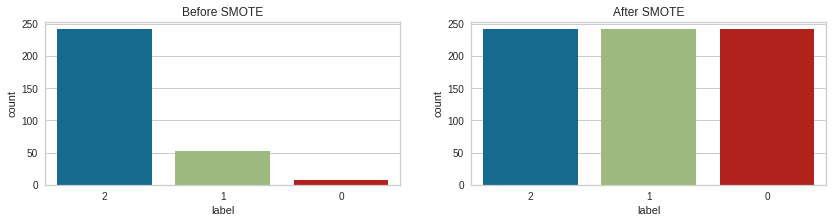

In [36]:
SMOTE_MODEL = SMOTE(random_state=30)

y_train_bow = y_train
# resampling
plt.figure(figsize=(14,3))
plt.subplot(121)
plt.title("Before SMOTE")
print("X_train shape before SMOTE: ", X_train_bow.shape)
print("y_train shape before SMOTE: ", y_train_bow.shape)
sns.countplot(x=y_train_bow, order=y_train_bow.value_counts().index)
plt.subplot(122)
X_train_bow, y_train_bow = SMOTE_MODEL.fit_resample(X_train_bow, y_train_bow)
plt.title("After SMOTE")
print("X_train shape after SMOTE: ", X_train_bow.shape)
print("y_train shape after SMOTE: ", y_train_bow.shape)
sns.countplot(x=y_train_bow, order=y_train_bow.value_counts().index)

Accuracy of MultinomialNB() is 0.8062015503875969
Precision Score of the classifier MultinomialNB() is 0.9069813176007866
Recall Score of the classifier MultinomialNB() is 0.5703703703703704
F1 Score of the classifier MultinomialNB() is 0.6419556328278437
Confusion Matrix of MultinomialNB() is 
 [[ 1  0  2]
 [ 0 14 22]
 [ 0  1 89]]
True positive =  1
False positive =  0
False negative =  0
True negative =  14
Sensitivity Score of the classifier is:  1.0
Specificity Score of the classifier is:  1.0


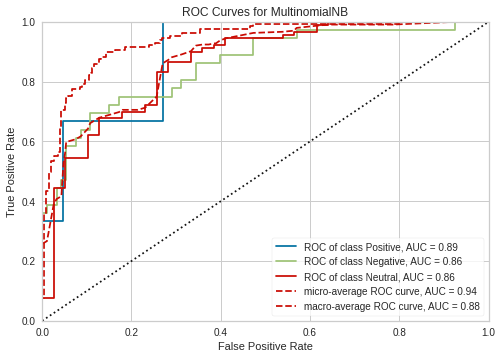




Accuracy of KNeighborsClassifier() is 0.6434108527131783
Precision Score of the classifier KNeighborsClassifier() is 0.43217893217893216
Recall Score of the classifier KNeighborsClassifier() is 0.4685185185185185
F1 Score of the classifier KNeighborsClassifier() is 0.42483660130718953
Confusion Matrix of KNeighborsClassifier() is 
 [[ 0  1  2]
 [ 0 29  7]
 [ 0 36 54]]
True positive =  0
False positive =  1
False negative =  0
True negative =  29
Sensitivity Score of the classifier is:  0.0
Specificity Score of the classifier is:  1.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


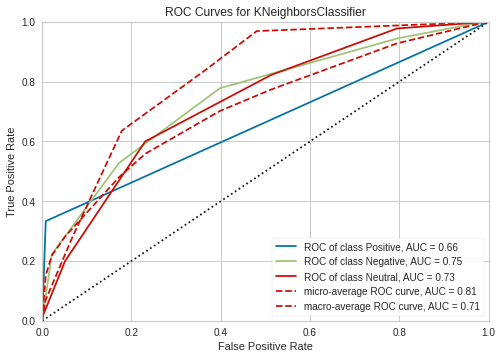




Accuracy of SVC(kernel='linear') is 0.7674418604651163
Precision Score of the classifier SVC(kernel='linear') is 0.8183760683760682
Recall Score of the classifier SVC(kernel='linear') is 0.5629629629629629
F1 Score of the classifier SVC(kernel='linear') is 0.6262313860252005
Confusion Matrix of SVC(kernel='linear') is 
 [[ 1  0  2]
 [ 0 16 20]
 [ 0  8 82]]
True positive =  1
False positive =  0
False negative =  0
True negative =  16
Sensitivity Score of the classifier is:  1.0
Specificity Score of the classifier is:  1.0


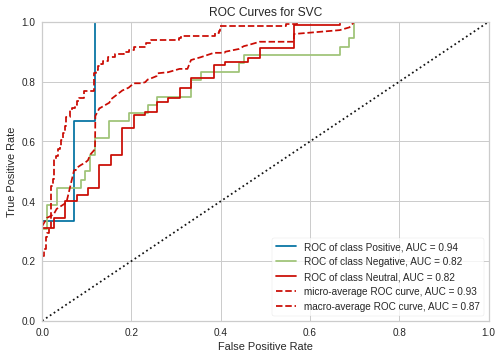

In [37]:
# Naive Bayes, KNN, SVM
ML_Eval = train_test_models(X_train_bin, y_train, X_test_bin, y_test) 

In [ ]:
# CNN
run_cnn(X_train_bin, X_test_bin, y_train, y_test)

Epoch 1/5
8/8 [==============================] - 2s 69ms/step - loss: 1.0603 - accuracy: 0.5728 - val_loss: 0.9866 - val_accuracy: 0.7538
Epoch 2/5
8/8 [==============================] - 0s 26ms/step - loss: 0.9269 - accuracy: 0.7583 - val_loss: 0.8397 - val_accuracy: 0.7538
Epoch 3/5
8/8 [==============================] - 0s 29ms/step - loss: 0.7793 - accuracy: 0.7682 - val_loss: 0.7144 - val_accuracy: 0.7538
Epoch 4/5
8/8 [==============================] - 0s 26ms/step - loss: 0.7025 - accuracy: 0.7715 - val_loss: 0.6911 - val_accuracy: 0.7538
Epoch 5/5
8/8 [==============================] - 0s 27ms/step - loss: 0.7099 - accuracy: 0.7715 - val_loss: 0.6849 - val_accuracy: 0.7538


Experiment 2 - Count Frequency Representation

Accuracy of MultinomialNB() is 0.7751937984496124
Precision Score of the classifier MultinomialNB() is 0.5752657004830918
Recall Score of the classifier MultinomialNB() is 0.5722222222222223
F1 Score of the classifier MultinomialNB() is 0.5538837677999141
Confusion Matrix of MultinomialNB() is 
 [[ 1  0  2]
 [ 3 17 16]
 [ 2  6 82]]
True positive =  1
False positive =  0
False negative =  3
True negative =  17
Sensitivity Score of the classifier is:  1.0
Specificity Score of the classifier is:  0.85


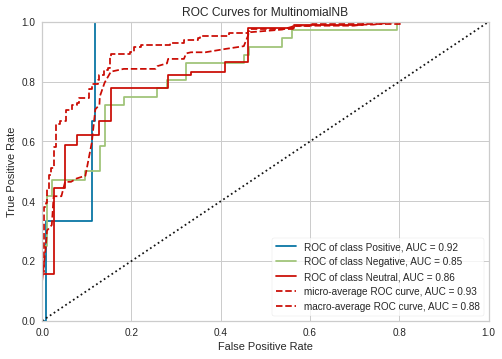




Accuracy of KNeighborsClassifier() is 0.24806201550387597
Precision Score of the classifier KNeighborsClassifier() is 0.27687930518119197
Recall Score of the classifier KNeighborsClassifier() is 0.3925925925925926
F1 Score of the classifier KNeighborsClassifier() is 0.1758692250119072
Confusion Matrix of KNeighborsClassifier() is 
 [[ 1  2  0]
 [ 5 30  1]
 [15 74  1]]
True positive =  1
False positive =  2
False negative =  5
True negative =  30
Sensitivity Score of the classifier is:  0.3333333333333333
Specificity Score of the classifier is:  0.8571428571428571


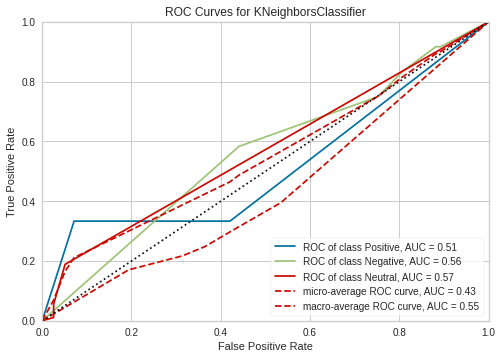




Accuracy of SVC(kernel='linear') is 0.7364341085271318
Precision Score of the classifier SVC(kernel='linear') is 0.5307898852202649
Recall Score of the classifier SVC(kernel='linear') is 0.5925925925925926
F1 Score of the classifier SVC(kernel='linear') is 0.5370865032403495
Confusion Matrix of SVC(kernel='linear') is 
 [[ 1  0  2]
 [ 5 24  7]
 [ 5 15 70]]
True positive =  1
False positive =  0
False negative =  5
True negative =  24
Sensitivity Score of the classifier is:  1.0
Specificity Score of the classifier is:  0.8275862068965517


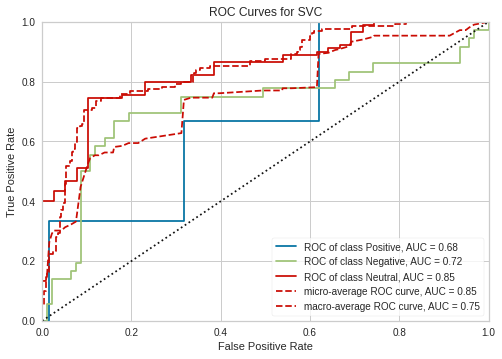

In [38]:
# Naive Bayes, KNN, SVM
ML_Eval = train_test_models(X_train_bow, y_train_bow, X_test_bow, y_test) 

In [ ]:
# CNN
run_cnn(X_train_bow, X_test_bow, y_train, y_test)

Epoch 1/50
10/10 [==============================] - 3s 62ms/step - loss: 1.0380 - accuracy: 0.5993 - val_loss: 0.9267 - val_accuracy: 0.7538
Epoch 2/50
10/10 [==============================] - 0s 17ms/step - loss: 0.8429 - accuracy: 0.7715 - val_loss: 0.7312 - val_accuracy: 0.7538
Epoch 3/50
10/10 [==============================] - 0s 17ms/step - loss: 0.6920 - accuracy: 0.7715 - val_loss: 0.6569 - val_accuracy: 0.7538
Epoch 4/50
10/10 [==============================] - 0s 15ms/step - loss: 0.6770 - accuracy: 0.7715 - val_loss: 0.6395 - val_accuracy: 0.7538
Epoch 5/50
10/10 [==============================] - 0s 14ms/step - loss: 0.6715 - accuracy: 0.7682 - val_loss: 0.6225 - val_accuracy: 0.7538
Epoch 6/50
10/10 [==============================] - 0s 31ms/step - loss: 0.6459 - accuracy: 0.7715 - val_loss: 0.6172 - val_accuracy: 0.7538
Epoch 7/50
10/10 [==============================] - 0s 13ms/step - loss: 0.6612 - accuracy: 0.7715 - val_loss: 0.6111 - val_accuracy: 0.7538
Epoch 8/50
10

##### Experiment 3 - TF-IDF

Accuracy of MultinomialNB() is 0.7364341085271318
Precision Score of the classifier MultinomialNB() is 0.5752688172043011
Recall Score of the classifier MultinomialNB() is 0.3796296296296296
F1 Score of the classifier MultinomialNB() is 0.36167464478383105
Confusion Matrix of MultinomialNB() is 
 [[ 0  0  3]
 [ 0  5 31]
 [ 0  0 90]]
True positive =  0
False positive =  0
False negative =  0
True negative =  5
Sensitivity Score of the classifier is:  nan
Specificity Score of the classifier is:  1.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-32-b6089ca0efed>:38: RuntimeWarning: invalid value encountered in long_scalars
  sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])


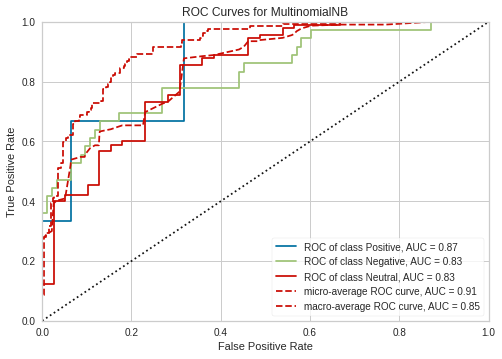




Accuracy of KNeighborsClassifier() is 0.7751937984496124
Precision Score of the classifier KNeighborsClassifier() is 0.5274705014749262
Recall Score of the classifier KNeighborsClassifier() is 0.4425925925925926
F1 Score of the classifier KNeighborsClassifier() is 0.4523809523809524
Confusion Matrix of KNeighborsClassifier() is 
 [[ 0  0  3]
 [ 0 13 23]
 [ 0  3 87]]
True positive =  0
False positive =  0
False negative =  0
True negative =  13
Sensitivity Score of the classifier is:  nan
Specificity Score of the classifier is:  1.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-32-b6089ca0efed>:38: RuntimeWarning: invalid value encountered in long_scalars
  sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])


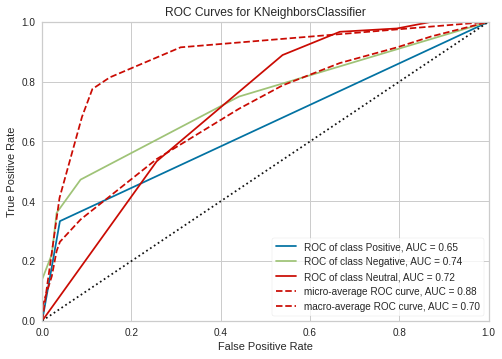




Accuracy of SVC(kernel='linear') is 0.7906976744186046
Precision Score of the classifier SVC(kernel='linear') is 0.5674948240165631
Recall Score of the classifier SVC(kernel='linear') is 0.45
F1 Score of the classifier SVC(kernel='linear') is 0.46276422764227637
Confusion Matrix of SVC(kernel='linear') is 
 [[ 0  0  3]
 [ 0 13 23]
 [ 0  1 89]]
True positive =  0
False positive =  0
False negative =  0
True negative =  13
Sensitivity Score of the classifier is:  nan
Specificity Score of the classifier is:  1.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-32-b6089ca0efed>:38: RuntimeWarning: invalid value encountered in long_scalars
  sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])


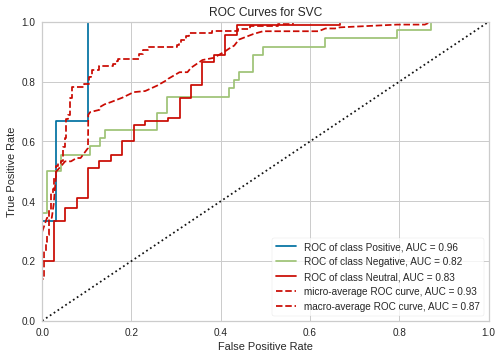

In [39]:
# Naive Bayes, KNN, SVM
ML_Eval = train_test_models(X_train_tfidf, y_train, X_test_tfidf, y_test) 

In [ ]:
# CNN
run_cnn(X_train_tfidf, X_test_tfidf, y_train,y_test)

Epoch 1/50
10/10 [==============================] - 2s 33ms/step - loss: 1.0445 - accuracy: 0.6788 - val_loss: 0.9689 - val_accuracy: 0.7538
Epoch 2/50
10/10 [==============================] - 0s 16ms/step - loss: 0.9148 - accuracy: 0.7649 - val_loss: 0.8097 - val_accuracy: 0.7538
Epoch 3/50
10/10 [==============================] - 0s 15ms/step - loss: 0.7333 - accuracy: 0.7682 - val_loss: 0.6898 - val_accuracy: 0.7538
Epoch 4/50
10/10 [==============================] - 0s 14ms/step - loss: 0.7368 - accuracy: 0.7682 - val_loss: 0.6884 - val_accuracy: 0.7538
Epoch 5/50
10/10 [==============================] - 0s 14ms/step - loss: 0.7044 - accuracy: 0.7715 - val_loss: 0.6664 - val_accuracy: 0.7538
Epoch 6/50
10/10 [==============================] - 0s 14ms/step - loss: 0.6959 - accuracy: 0.7715 - val_loss: 0.6625 - val_accuracy: 0.7538
Epoch 7/50
10/10 [==============================] - 0s 13ms/step - loss: 0.6863 - accuracy: 0.7682 - val_loss: 0.6571 - val_accuracy: 0.7538
Epoch 8/50
10

Experiment 4 - Word Embeddings with gloVe

In [ ]:
# Naive Bayes, KNN, SVM
ML_Eval = train_test_models(embedding_matrix, y_train, X_test, y_test) 

ValueError: ignored

In [ ]:
# RNN
run_rnn(X_train, y_train, X_test, y_test)

136                                                                                                                                   artistri technolog bring life handcarv hindu templ uae
132    within advanc technolog solut presenc emir red crescent fbmi unicef world food program intern organ well distinguish guest salem al owai uae ambassador colombia us senat kevin thoma
189                                  expand contact busi uae manag director banc chairman alghyath group visit uski centr sharjahth guest told compani ’ develop invest ust technolog regist
314                                       worldgovernmentsummit labx centr innov public sector win “ distinguish initi govern innov read full coverag dubai uae news video sajila saseendran
385                                                             celebr spirit innov shape brighter futur uaewhat impact innov way live work interact next decadedubaifutur uae innovationday
                                                       

KeyboardInterrupt: ignored

###D.	Visualization and Insights from Tweets
####Topic Modelling using LDA (Latent Dirichlet Allocation)

In [40]:
# References: 
# https://ourcodingclub.github.io/tutorials/topic-modelling-python/#text_corr
# https://medium.com/swlh/sentiment-analysis-topic-modeling-for-hotel-reviews-6b83653f5b08

num_topics = 15

vectorizer = CountVectorizer(ngram_range = (3,3))
count_tf = vectorizer.fit_transform(tweet_df['Tweet Body'])

model = lda(n_components=num_topics, random_state=0)
model.fit(count_tf)

tf_feature_names = vectorizer.get_feature_names_out()

In [41]:
def display_topics(model, feature_names, num_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-num_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-num_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

num_top_words = 10
display_topics(model, tf_feature_names, num_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,...,Topic 10 words,Topic 10 weights,Topic 11 words,Topic 11 weights,Topic 12 words,Topic 12 weights,Topic 13 words,Topic 13 weights,Topic 14 words,Topic 14 weights
0,in the uae,4.1,and advanced technology,4.1,in the uae,3.3,in the uae,3.1,in the uae,12.6,...,in the uae,8.3,the uae innovation,3.1,in the uae,6.1,ai ministry of,8.1,in uae singapore,4.1
1,innovation in the,3.2,industry and advanced,3.1,in abu dhabi,3.1,the uae and,2.1,emirates defense technology,4.6,...,with steadicopter to,4.1,as part of,3.1,and advanced technology,3.1,alhebsi advisor in,8.1,resources and emiratisation,4.1
2,and innovation in,3.1,of industry and,3.1,the uae and,2.6,in the presence,2.1,rotary uas in,4.1,...,supply rotary unmanned,4.1,uae innovation month,3.1,to enhance the,3.1,in ai ministry,8.1,ministry of human,4.1
3,forasaferworld uae abudhabi,2.1,the ministry of,3.1,the way in,2.1,the presence of,2.1,defense technology to,4.1,...,steadicopter to supply,4.1,innovation in the,3.1,investment opportunities and,3.1,mohammed alhebsi advisor,8.1,human resources and,4.1
4,to see the,2.1,ministry of industry,3.1,sheikh mohammed bin,2.1,innovation and technology,2.1,to supply steadicopter,4.1,...,to supply rotary,4.1,science and technology,3.1,advanced technology sector,3.1,resources and emiratisation,7.9,advisor in ai,4.1
5,and drive innovation,2.1,and saudi arabia,3.1,as leader in,2.1,we can expect,2.1,uas in the,4.1,...,emirates defense technology,3.3,in the uae,3.1,environment in sharjah,3.1,ministry of human,7.9,of human resources,4.1
6,great to see,2.1,uae and saudi,3.1,in the global,2.1,with the uae,2.1,steadicopter rotary uas,4.1,...,defense technology edt,3.1,of the uae,2.1,sharjah industrial and,3.1,human resources and,7.9,in ai ministry,4.1
7,technology at the,2.1,to promote the,3.1,advanced technology and,2.1,in partnership with,2.1,supply steadicopter rotary,4.1,...,joins forces with,3.1,central bank of,2.1,and enablers to,3.1,advisor in ai,7.9,mohammed alhebsi advisor,4.1
8,us at the,2.1,advanced technology moiat,3.1,minister of industry,2.1,in order to,2.1,technology to supply,4.1,...,forces with steadicopter,3.1,bank of the,2.1,opportunities and provide,3.1,of human resources,7.9,ai ministry of,4.1
9,and digital economy,2.1,it in the,3.1,mohammed bin rashid,2.1,has established the,2.1,the development of,3.1,...,unmanned aerial systems,3.1,innovation month 2023,2.1,provide incentives and,3.1,on your health,7.1,alhebsi advisor in,4.1


In [42]:
"""
Parameter tuning and GridSearch to find optimal LDA model
# Reference: https://medium.com/swlh/sentiment-analysis-topic-modeling-for-hotel-reviews-6b83653f5b08
"""

search_params = {
        'n_components': [5, 10, 15, 20, 25, 30], 
        'learning_decay': [.5, .7, .9]
        }

grid_model = GridSearchCV(lda(), param_grid=search_params)
grid_model.fit(count_tf)
bestmodel = grid_model.best_estimator_

print("Parameters for optimal LDA model: ", grid_model.best_params_)

print("Model Log Likelihood Score: ", grid_model.best_score_)

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Model Perplexity: ", bestmodel.perplexity(count_tf))

Parameters for optimal LDA model:  {'learning_decay': 0.5, 'n_components': 5}
Model Log Likelihood Score:  -40891.019460414405
Model Perplexity:  14558.75874930607


In [43]:
pyLDAvis.enable_notebook()

pyLDAvis.lda_model.prepare(bestmodel, count_tf, vectorizer)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.144296  0.018960       1        1  21.895336
4     -0.025159 -0.076791       2        1  20.931289
3     -0.055307  0.125214       3        1  19.867757
0     -0.038756 -0.041493       4        1  19.234343
2     -0.025074 -0.025891       5        1  18.071275, topic_info=                             Term      Freq     Total Category  logprob  \
316                 advisor in ai  7.000000  7.000000  Default  30.0000   
5953           of human resources  7.000000  7.000000  Default  29.0000   
5577            ministry of human  7.000000  7.000000  Default  28.0000   
6956  resources and emiratisation  7.000000  7.000000  Default  27.0000   
3871          human resources and  7.000000  7.000000  Default  26.0000   
...                           ...       ...       ...      ...      ...   
8374                 the power of  1.668526  4.299402   Topic5  -7.1966   
4925                    it in the  1.668063  2.652259   Topic5  -7.1969   
4240                in the region  1.668058  3.243348   Topic5  -7.1969   
297       advanced technology and  1.667985  3.221639   Topic5  -7.1969   
6097                   of the uae  1.667975  6.000181   Topic5  -7.1969   

      loglift  
316   30.0000  
5953  29.0000  
5577  28.0000  
6956  27.0000  
3871  26.0000  
...       ...  
8374   0.7643  
4925   1.2471  
4240   1.0459  
297    1.0526  
6097   0.4307  

[232 rows x 6 columns], token_table=       Topic      Freq                       Term
term                                             
22         5  0.948470              15th amp 16th
175        3  0.919154              abu dhabi get
297        2  0.310401    advanced technology and
297        5  0.620802    advanced technology and
301        5  0.760504  advanced technology moiat
...      ...       ...                        ...
9818       3  0.735413         web3 startups with
9918       1  1.012862              why not focus
10048      2  0.721754       with steadicopter to
10185      4  0.743608      yearround crops using
10228      1  0.885630        your health through

[280 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 1, 3])

####NMF
Latent Semantic Analysis with the ‘Non-negative Matrix-Factorization’ method
- NMF calculates how much each document talks about each
topic, while LDA determines the different topics that may be contained in each document

In [44]:
from sklearn.preprocessing import normalize;

vectorizer = CountVectorizer(ngram_range = (3,3));
countf = vectorizer.fit_transform(tweet_df['Tweet Body']);

# Tfidf transform the counts with the model
transformer = TfidfTransformer(smooth_idf=False);
tfidf_transform = transformer.fit_transform(countf);

tfidf_transform = normalize(tfidf_transform, norm='l1', axis=1)

#obtaining NMF model
nmf_model = NMF(n_components=num_topics);
#fitting the model
nmf_model.fit(tfidf_transform)

NMF(n_components=15)

In [45]:
# Generating NMF topics with words occur the most in the tweets
components_tweet_df = pd.DataFrame(model.components_, columns=vectorizer.get_feature_names_out())
for topic in range(components_tweet_df.shape[0]):
    tmp = components_tweet_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(5))
    print('\n')

For topic 1 the words with the highest value are:
in the uae                     4.066667
innovation in the              3.182246
and innovation in              3.066664
forasaferworld uae abudhabi    2.066667
to see the                     2.066667
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
and advanced technology    4.066667
industry and advanced      3.066667
of industry and            3.066667
the ministry of            3.066667
ministry of industry       3.066667
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
in the uae             3.342967
in abu dhabi           3.066667
the uae and            2.579784
the way in             2.066667
sheikh mohammed bin    2.066667
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
in the uae                   3.066667
the uae and                  2.066667
in the presence              2.066667
the presence of              2.066667
innovation and technology    2

In [46]:
# Creating seperate dataframes for positive, negative and neutral sentiment tweets
pos_df = tweet_df.loc[tweet_df['updated sentiments']=='positive']
neg_df = tweet_df.loc[tweet_df['updated sentiments']=='negative']
neutral_df = tweet_df.loc[tweet_df['updated sentiments']=='neutral']

In [47]:
# Displaying NMF topics for a certain sentiment label
# (Garla, 2021)
def display_topics(model, feature_names, top_words,topic_names=None):

# iterating through the topics in topic-term matrix
  for t, topic in enumerate(model.components_):
      if not topic_names or not topic_names[t]:
          print("\nTopic ", t)
      else:
          print("\nTopic: '",topic_names[t],"'")
      print(", ".join([feature_names[i] \
            for i in topic.argsort()[:-top_words - 1:-1]]))

In [48]:
#Fitting and Transforming text to a TF-IDF Doc-Term Matrix
pos_data_dox = vectorizer.fit_transform(pos_df['Tweet Body'])

#Creating a dataframe of the doc-term matrix
pos_data_dox_df = pd.DataFrame(pos_data_dox.toarray(), columns=vectorizer.get_feature_names_out())
doc_topic = nmf_model.fit_transform(pos_data_dox_df)

#displaying topics with positive sentiments
display_topics(nmf_model, vectorizer.get_feature_names_out(), 5)


Topic  0
in the middle, using combination of, the farm produces, sharjahbased aggrotech startup, crops using combination

Topic  1
in abu dhabi, get ready to, forward to seeing, systems and solutions, experience innovation at

Topic  2
and advanced technology, industry and advanced, of industry and, the ministry of, ministry of industry

Topic  3
in the uae, the uae and, innovation in the, the use of, the uae the

Topic  4
to take off, the way in, sheikh mohammed bin, flyingtaxis set to, taxi stations aligning

Topic  5
summit 2023 saudi, uae on 15th, the hospitality innovation, al habtoor city, on 15th amp

Topic  6
web3 startups with, the growth of, with access to, startups with access, access to corporate

Topic  7
and advanced technology, investment opportunities and, to enhance the, in sharjah industrial, technology sector uae

Topic  8
technology iit indore, global best mgov, indian institute of, of technology iit, institute of technology

Topic  9
uae innovation month, the uae 

In [49]:
#Fitting and Transforming text to a TF-IDF Doc-Term Matrix
neg_data_dox = vectorizer.fit_transform(neg_df['Tweet Body'])

#Creating a dataframe of the doc-term matrix
neg_data_dox_df = pd.DataFrame(neg_data_dox.toarray(), columns=vectorizer.get_feature_names_out())
doc_topic = nmf_model.fit_transform(neg_data_dox_df)

#displaying topics with negative sentiments
display_topics(nmf_model, vectorizer.get_feature_names_out(), 5)


Topic  0
the world needs, advanced technology addressed, of the worldgovsummit, needs major course, the presidentdesignate of

Topic  1
central bank of, to illegally export, users in iran, in uaesanctions iran, the central bank

Topic  2
27 million in, venture capital firm, aiming to help, the european union, the covid19 pandemic

Topic  3
rule the world, of oil related, date no innovation, money but till, the world all

Topic  4
the middleeast and, middleeast and pakistan, across the middleeast, in uaebased venture, firm aiming to

Topic  5
uae december 15, track 30 breast, 17 2023 submit, cancer with technology, 15 17 2023

Topic  6
technology did you, and technology did, trouble is you, touch with society, to steal 35million

Topic  7
for space and, crises and natural, membership in the, humanitarian crises and, is powerful example

Topic  8
to buy shares, in cyprus there, fake companies in, family was also, uaes royal family

Topic  9
inform you that, technology it is, be held in,

In [50]:
#Fitting and Transforming text to a TF-IDF Doc-Term Matrix
neutral_data_dox = vectorizer.fit_transform(neutral_df['Tweet Body'])

#Creating a dataframe of the doc-term matrix
neutral_data_dox_df = pd.DataFrame(neutral_data_dox.toarray(), columns=vectorizer.get_feature_names_out())
doc_topic = nmf_model.fit_transform(neutral_data_dox_df)

#displaying topics with neutral sentiments
display_topics(nmf_model, vectorizer.get_feature_names_out(), 5)


Topic  0
health through digital, your health through, alhebsi advisor in, in ai ministry, ai ministry of

Topic  1
in the uae, the uae and, at the checkout, have launched new, technology that allows

Topic  2
and technology are, how artistry and, are bringing to, artistry and technology, to life handcarved

Topic  3
emirates defense technology, in the uae, steadicopter to supply, supply rotary unmanned, to supply rotary

Topic  4
uae funded by, go to his, invented in uae, emirates the guy, understand the technology

Topic  5
of the world, us we are, we will push, the are going, the future of

Topic  6
in the uae, and june 2021, brooklyn for end, illegally procure electronic, his coconspirators used

Topic  7
turkey and africa, middle east turkey, ict spending in, east turkey and, uae and saudi

Topic  8
advisor in ai, of human resources, resources and emiratisation, ministry of human, human resources and

Topic  9
cater to their, are gamechanger in, sector providing students, technolo

####Word Clouds

In [51]:
positive = tweet_df.loc[tweet_df['updated sentiments']=='positive', 'Tweet Body'].tolist() 
negative = tweet_df.loc[tweet_df['updated sentiments']=='negative', 'Tweet Body'].tolist() 
neutral = tweet_df.loc[tweet_df['updated sentiments']=='neutral', 'Tweet Body'].tolist()

WordCloud for Positive words


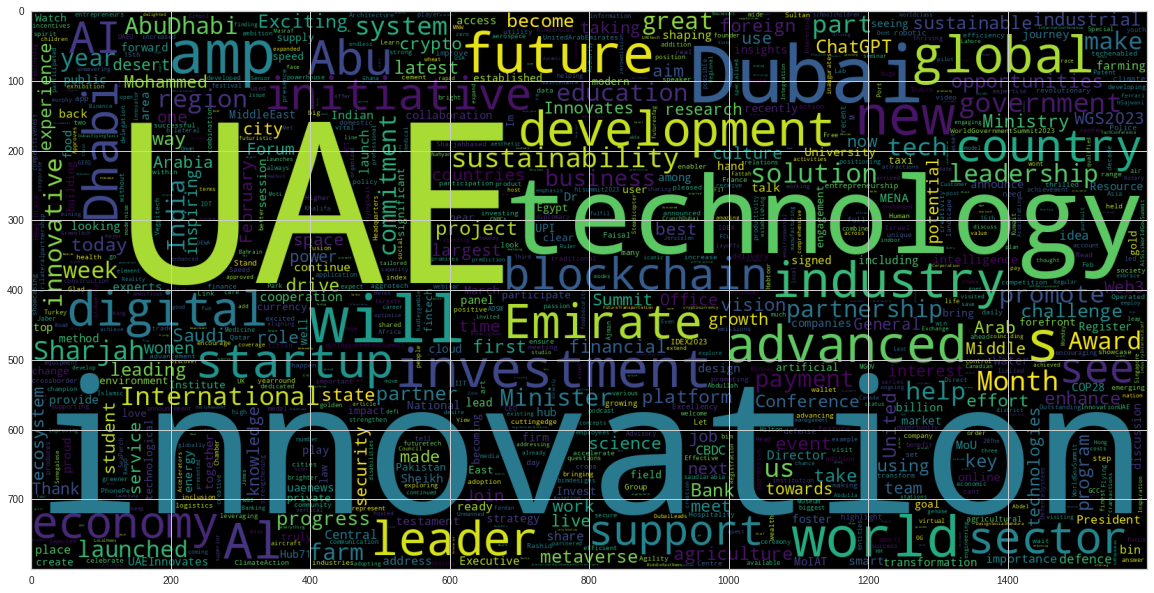

In [52]:
# Word Cloud for Positive Tweets

print('WordCloud for Positive words')
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive))
plt.figure(figsize = (20,20))
plt.imshow(wc)

WordCloud for Negative words


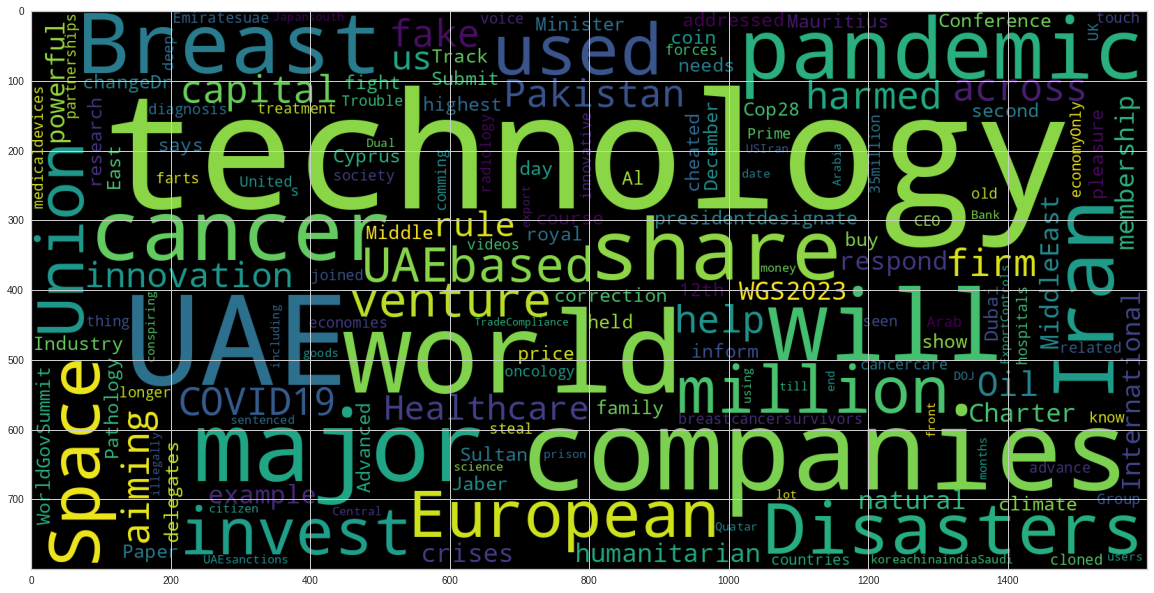

In [53]:
# Word Cloud for Negative Tweets

print('WordCloud for Negative words')
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative))
plt.figure(figsize = (20,20))
plt.imshow(wc)

WordCloud for Neutral words


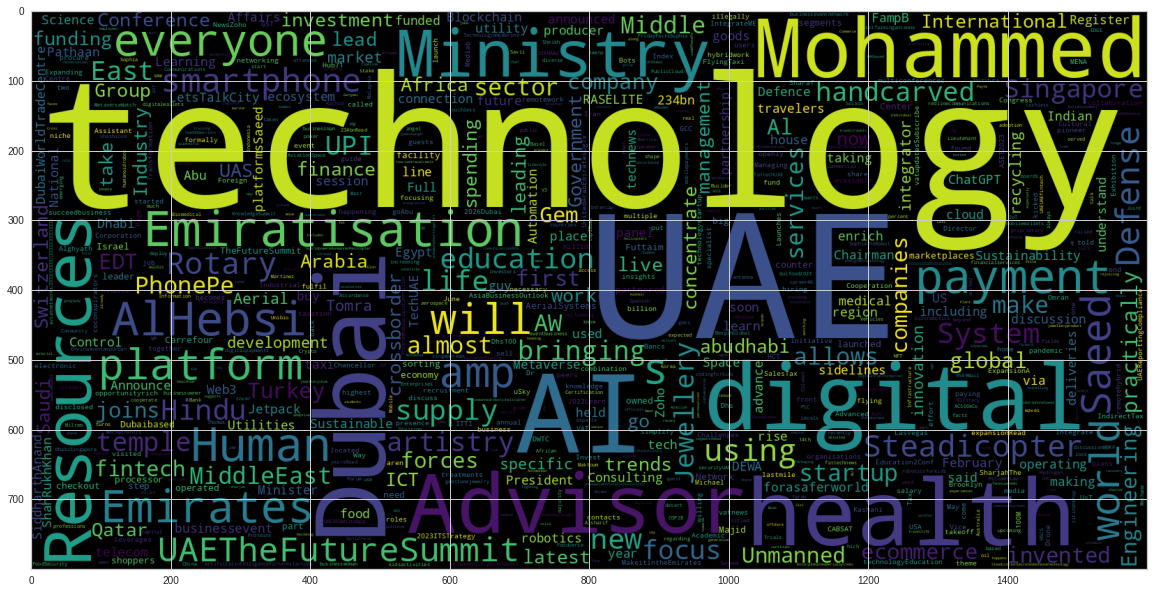

In [54]:
# Word Cloud for Neutral Tweets

print('WordCloud for Neutral words')
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(neutral))
plt.figure(figsize = (20,20))
plt.imshow(wc)

###E.	Discussion and conclusion from experiments  
  


- Decisions about data labelling were made by experimenting with different labelling techniques. We used Vader for one experiment, and for the other experiment, we used Vader combined with a crowd-sourced emoticon lexicon as well as a lexicon generated on Twitter data corpus. While Vader  generally correct sentiments to tweets, the labels were not consistent, as opposed to out ensemble approach which was. Furthermore, Vader could not capture tweets that were obviously positive in their tone and had trouble assigning sentiments to tweets that used sarcasm. The ensemble method did much better in these scenarios. For this reason, we used a combination of Vader and Emoji Sentiment Analysis.
- Next choice was made between the normalising techniques: Stemming and Lemmatisation. While both methods gave about the same performance evaluation results, Stemming was chosen as it was most appropriate for a large dataset such as ours. Lemmatisation is also computationally expensive compared to Stemming.
  - The Snowball stemmer was utilized here as it is more precise, logical and faster compared to other stemmers. It also avoids the problem of overstemming.
- The SMOTE technique (Synthetic Minority Oversampling Technique) was used for tackling the imbalanced dataset problem, as majority of the tweets sentiments were positive.
- Count Frequency representation yielded the best results when tested against the ML classifiers as compared to Binary and Tfidf vectorization. The CNN, on the other hand, yielded similar performance with all types of feature representations. Furthermore, it can be noticed that the CNN converges very quickly (after 5 epochs). We assume this is because the CNN is overfitting to our data. We tried incorporating SMOTE in an effort to increase the number of samples, but we noticed that the synthetic representations generated by SMOTE did not work well with the CNN. For this reason, we ommitted using SMOTE. We conclude that since our dataset is not very large, a simpler machine learning model, like the SVM, works best both in terms of the overfitting problem and performance.
  - Unigram features too resulted in the best performance when compared to bigrams and trigrams.

- We used pretrained word embeddings using GloVe created by StanfordAI. We used these embeddings to train a RNN. However, the RNN did not perform well with a peak accuracy of 0.46. This, along with its significantly high training time suggests that our RNN is not the optimal classifier for this scenario.  

- The visualisation techniques such as LDA, NMF and Word Cloud gave valuable insights about how people feel about ‘Technology in UAE’. Most tweets were associated with this topic were overwhelmingly positive. 
  - Positive sentiment tweets involved innovation, climate action by UAE, developments in agriculture, promotion of culture and investment activities. 
  -Negative sentiments around this topic mostly revolved around foreign political policies, climate change, economic sanctions and humanitarian crises such as the recent pandemic.
  - Neutral sentiment tweets were the least in this dataset, and concerned defence technology, digital economy, online payment methods, and government policies such as Emiratisation. 

- These findings were conclusive and informative in discovering how people feel about certain topics, and how these sentiments eventually affect real-world policies and laws. For example, the way people feel about something can also channel economies like purchasing mediums, payment methods, country sanctions and marketing channels.